In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re

In [34]:
df = pd.read_csv('lyrics.csv')
print(df.head())
terms_to_remove = ['vers', 'chorus']

# Function to clean text by removing specific terms
def remove_terms(text, terms):
    pattern = '|'.join([re.escape(term) for term in terms])
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Apply the function to the 'lyrics' column
df['cleaned_lyrics'] = df['lyrics'].apply(lambda x: remove_terms(x, terms_to_remove))

                 name                      album  \
0           Evil Twin   Suck It and See - Single   
1  Only Ones Who Know  Favourite Worst Nightmare   
2            Arabella                         AM   
3     Cigarette Smoke      Beneath The Boardwalk   
4   Reckless Serenade            Suck It and See   

                                              lyrics  
0  [Verse 1]\nYou've never met before\nBut still ...  
1  [Verse 1]\nIn a foreign place, the saving grac...  
2  [Verse 1]\nArabella's got some interstellar-ga...  
3  Get out the way, mister\nWith your short sharp...  
4  [Verse 1]\nTopless models doing Semaphore\nWav...  


In [35]:
df['cleaned_lyrics'] = df['cleaned_lyrics'].str.lower()
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['cleaned_lyrics'] = df['cleaned_lyrics'].apply(remove_punctuation)

In [36]:
print(df['cleaned_lyrics'])

0      e 1 youve never met before but still she greet...
1      e 1 in a foreign place the saving grace was th...
2      e 1 arabellas got some interstellargator skin ...
3      get out the way mister with your short sharp t...
4      e 1 topless models doing semaphore wave their ...
                             ...                        
139    e 1 just put your dukes up john yeah put your ...
140    e 1 have you got colour in your cheeks do you ...
141    e 1 space invaders flying home and theyre goin...
142    e 1 break a mirror roll the dice run with scis...
143    e 1 i want an interesting synonym to describe ...
Name: cleaned_lyrics, Length: 144, dtype: object


In [37]:
#tokenization
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data (only need to run once)
nltk.download('punkt')

df['tokens'] = df['cleaned_lyrics'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
#stopwords removal
from nltk.corpus import stopwords

# Download stopwords list (only need to run once)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

df['tokens'] = df['tokens'].apply(stem_tokens)


In [40]:
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['tokens'] = df['tokens'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
print(df['tokens'])

0      [e, 1, youv, never, met, still, greet, like, l...
1      [e, 1, foreign, place, save, grace, feel, hear...
2      [e, 1, arabella, got, interstellarg, skin, boo...
3      [get, way, mister, short, sharp, tip, wont, re...
4      [e, 1, topless, model, semaphor, wave, flag, w...
                             ...                        
139    [e, 1, put, duke, john, yeah, put, duke, john,...
140    [e, 1, got, colour, cheek, ever, get, fear, ca...
141    [e, 1, space, invad, fli, home, theyr, go, hit...
142    [e, 1, break, mirror, roll, dice, run, scissor...
143    [e, 1, want, interest, synonym, describ, thing...
Name: tokens, Length: 144, dtype: object


In [43]:
def tokens_to_text(tokens):
    return ' '.join(tokens)

df['cleaned_lyrics_tok'] = df['tokens'].apply(tokens_to_text)


In [44]:
print(df['cleaned_lyrics_tok'])

0      e 1 youv never met still greet like long lost ...
1      e 1 foreign place save grace feel heart steal ...
2      e 1 arabella got interstellarg skin boot helte...
3      get way mister short sharp tip wont read lip r...
4      e 1 topless model semaphor wave flag walk get ...
                             ...                        
139    e 1 put duke john yeah put duke john preen san...
140    e 1 got colour cheek ever get fear cant shift ...
141    e 1 space invad fli home theyr go hit sack the...
142    e 1 break mirror roll dice run scissor chippan...
143    e 1 want interest synonym describ thing say gr...
Name: cleaned_lyrics_tok, Length: 144, dtype: object


In [59]:
from collections import Counter

all_tokens = [token for tokens in df['tokens'] for token in tokens]
token_freq = Counter(all_tokens)
print(token_freq.most_common(30)) 


[('e', 306), ('your', 212), ('im', 177), ('dont', 176), ('know', 175), ('like', 169), ('oh', 152), ('get', 152), ('go', 136), ('well', 136), ('got', 133), ('yeah', 133), ('2', 132), ('1', 131), ('come', 119), ('na', 114), ('want', 109), ('one', 106), ('look', 105), ('love', 98), ('she', 92), ('babi', 90), ('’', 89), ('said', 87), ('wan', 85), ('make', 84), ('there', 82), ('cant', 80), ('la', 78), ('thing', 77)]


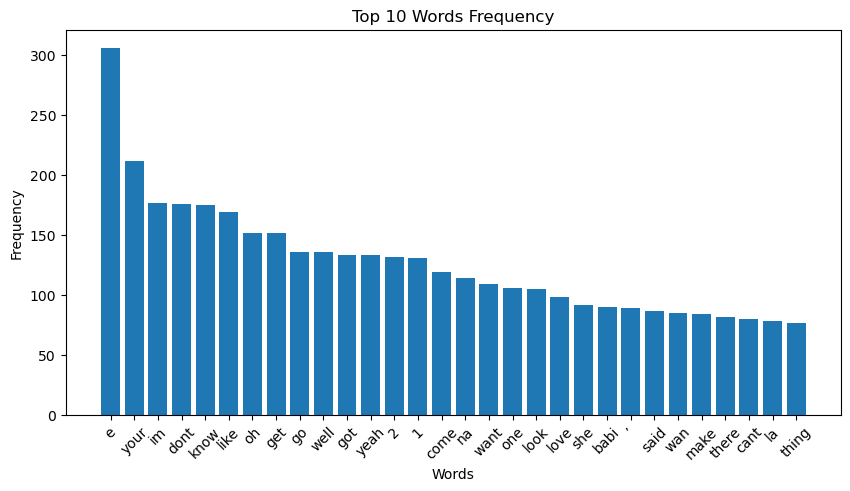

In [58]:
import matplotlib.pyplot as plt
from collections import Counter

# Frequency Analysis
all_tokens = [token for tokens in df['tokens'] for token in tokens]
token_freq = Counter(all_tokens)

# Plotting the top 10 most common words
top_words = token_freq.most_common(30)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words Frequency')
plt.xticks(rotation=45)
plt.show()


In [47]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['sentiment'] = df['cleaned_lyrics_tok'].apply(lambda text: sid.polarity_scores(text)['compound'])
print(df[['name', 'sentiment']].head())


                 name  sentiment
0           Evil Twin     0.9829
1  Only Ones Who Know     0.9829
2            Arabella     0.9809
3     Cigarette Smoke     0.9382
4   Reckless Serenade    -0.9501


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_lyrics_tok'])

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['oooh', 'strang', 'laugh', 'background', 'got', 'easi', 'brick', 'reckless', 'im', 'serenad']
Topic 1:
['good', 'know', 'someth', 'come', 'need', 'look', 'like', 'yeah', 'love', 'babi']
Topic 2:
['caus', 'got', 'want', 'oh', 'know', 'im', 'come', 'wan', 'na', 'instrument']
Topic 3:
['idst', 'turn', 'know', 'thing', 'seen', 'babi', 'dark', 'im', 'snap', 'like']
Topic 4:
['want', 'look', 'youll', 'im', 'wait', 'said', 'oh', 'know', 'dont', 'yeah']


In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


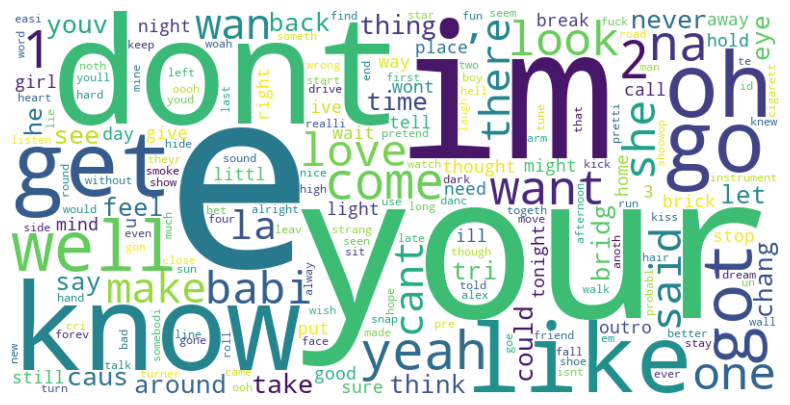

In [49]:
from wordcloud import WordCloud

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
